In [1]:
import pandas as pd
import os
import subprocess
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_dir = "../../data/"

In [3]:
# Read in the posterior estimates of the disease specific mean 
# differences and standard deviations.
pth = os.path.join(data_dir, 'post-stan-v8-results-2019-07-30.hd5')
res = pd.read_hdf(pth, key='results')

In [4]:
pth = '../../data/pptc-pdx-clinical-web.txt'

pdx_clinical = pd.read_csv(pth, sep='\t')

#pdx_clinical = pdx_clinical[pdx_clinical['Histology'].isin(hists)]
pdx_clinical = pdx_clinical[pdx_clinical['RNA.Part.of.PPTC'] == 'yes']

In [5]:
hist_drops = []
_low_num = (pdx_clinical.groupby('Histology.Detailed').count() <= 2).any(axis=1)
for hist, is_low in _low_num.iteritems():
    if is_low == True:
        hist_drops.append(hist)

In [6]:
res.head()

,disease,gene,effect,error,hugo
0,BCP-ALL,ENSG00000019582.14,8.102033,0.089688,CD74
1,MLL-ALL,ENSG00000019582.14,7.628470,0.163798,CD74
2,Ph+-ALL,ENSG00000019582.14,8.201045,0.161292,CD74
3,T-ALL,ENSG00000019582.14,-0.993488,0.152176,CD74
4,Ph-likeALL,ENSG00000019582.14,7.920443,0.096277,CD74


In [7]:
cmd = """
Rscript
fastgsea-no-min.R
filtered-tiger-tissgdb-gene-sets.gmt
/tmp/fgsea-analysis-stan-res.rnk
/tmp/fgsea-analysis-stan-res.fgsea
""".strip().split('\n')

fgseas = {}
for disease, _res in res.groupby('disease'):
    # Keep largest effect for duplicate gene symbols
    _res.loc[:, 'abs-effect'] = _res['effect'].abs()
    _res.sort_values('abs-effect', ascending=False, inplace=True)
    _res.drop_duplicates('hugo', keep='first', inplace=True)
    _res.sort_values('effect', ascending=False, inplace=True)
    
    _res[['hugo', 'effect']].to_csv('/tmp/fgsea-analysis-stan-res.rnk',
                                     header=None,
                                     sep='\t',
                                     index=False)
    
    subprocess.check_call(cmd)
    
    fgsea = pd.read_csv('/tmp/fgsea-analysis-stan-res.fgsea')
    
    fgseas[disease] = fgsea
    
    os.remove('/tmp/fgsea-analysis-stan-res.rnk')
    os.remove('/tmp/fgsea-analysis-stan-res.fgsea')

/home/jpfeil/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/jpfeil/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/jpfeil/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org

/home/jpfeil/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/jpfeil/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/jpfeil/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org

/home/jpfeil/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/jpfeil/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/jpfeil/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org

/home/jpfeil/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/jpfeil/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/jpfeil/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org

/home/jpfeil/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/jpfeil/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/jpfeil/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org

/home/jpfeil/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/jpfeil/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/jpfeil/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org

In [8]:
# Obtain the set of all significantly enriched tissue gene sets. 
# The threshold for significants is an adjustest p-value less than
# 0.01 and a normalized enrichment greater than 2.

alpha = 0.01
sig_gss = set()
for disease, fgsea in fgseas.items():
    mask = (fgsea['padj'] < alpha) & (fgsea['NES'] > 2.0)
    _sigs = fgsea[mask]
    sig_gss.update(list(_sigs['pathway'].values))
    
sig_gss

{'adrenal-gland (TissGDB)',
 'bladder (TissGDB)',
 'blood (TiGER)',
 'bone (TiGER)',
 'bone-marrow (TissGDB)',
 'brain (TissGDB)',
 'eye (TissGDB)',
 'heart (TiGER)',
 'kidney (TissGDB)',
 'liver (TissGDB)',
 'lymph-node (TiGER)',
 'muscle (TiGER)',
 'ovary (TissGDB)',
 'peripheral-nervous-system (TiGER)',
 'skin (TissGDB)',
 'small-intestine (TiGER)',
 'soft-tissue (TissGDB)',
 'spleen (TiGER)',
 'thymus (TissGDB)',
 'thyroid-gland (TissGDB)',
 'uterus (TissGDB)'}

In [9]:
# Iterate over the fgsea results and 
# pull out all of the statistically significant 
# enrichment scores across all PDX diseases.

gs_df = pd.DataFrame(index=list(fgseas.keys()), 
                     columns=list(sig_gss))
for disease, fgsea in fgseas.items():
    for gs in sig_gss:
        # Raise an error if a sample has a NaN gene set enrichment score
        if pd.isnull(fgsea.loc[fgsea['pathway'] == gs, 'NES']).any():
            raise ValueError()
            
        # Raise an error if a sample is missing a gene set enrichment score
        if fgsea.loc[fgsea['pathway'] == gs, 'NES'].shape == (0, ):
            raise ValueError()
            
        # Raise an error if a sample has more than one enrichment score
        if fgsea.loc[fgsea['pathway'] == gs, 'NES'].shape[0] > 1:
            raise ValueError()
        
        
        nes = fgsea.loc[fgsea['pathway'] == gs, 'NES'].item()
        pvalue = fgsea.loc[fgsea['pathway'] == gs, 'padj'].item()
        
        # If an enrichment is statistically significant report it
        # otherwise set the enrichment to zero.
        if pvalue < alpha:
            gs_df.loc[disease, gs] = nes
            
        else:
            gs_df.loc[disease, gs] = 0.0

# Set the columns to numeric for plotting
for c in gs_df.columns:
    gs_df[c] = pd.to_numeric(gs_df[c])

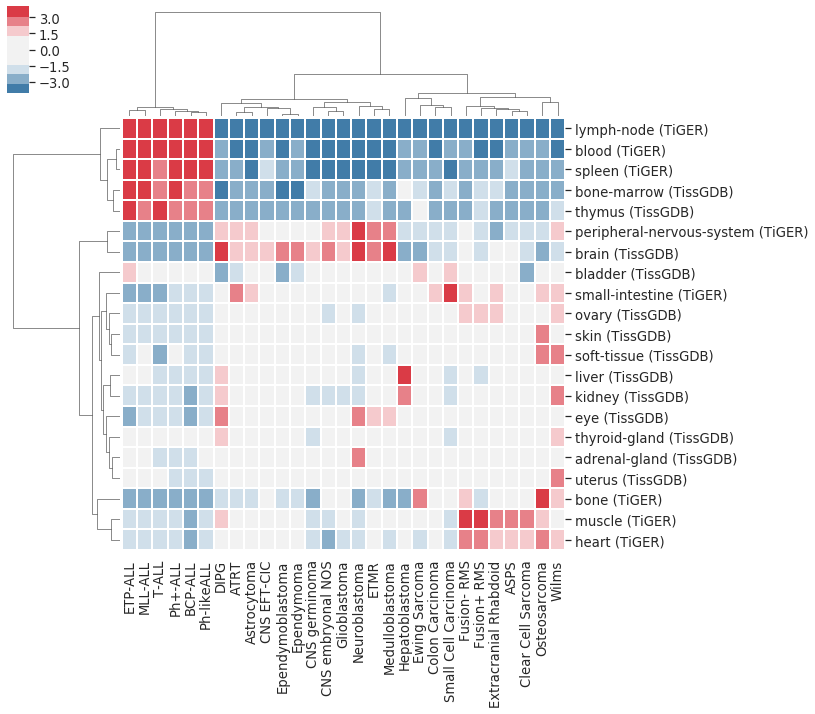

In [10]:
sns.set(font_scale=1.2)

cmap = sns.diverging_palette(240, 10, sep=100, n=9)

sns.clustermap(gs_df.T,
               cmap=cmap,
               figsize=(10, 10),
               method='ward',
               vmin=-4.0,
               vmax=4.0, 
               linewidths=1.0)

pth = os.path.join(data_dir, 'fgsea-analysis-stan-v8-tiger-2019-07-30.svg')
plt.savefig(pth, format='svg', bbox_inches='tight')

In [11]:
# Pathway Analysis

cmd = """
Rscript
fastgsea-no-min.R
../../data/Human_GOBP_AllPathways_no_GO_iea_December_01_2018_symbol.gmt
/tmp/fgsea-analysis-stan-res.rnk
/tmp/fgsea-analysis-stan-res.fgsea
""".strip().split('\n')

fgseas2 = {}
for disease, _res in res.groupby('disease'):
    # Keep largest effect for duplicate gene symbols
    _res.loc[:, 'abs-effect'] = _res['effect'].abs()
    _res.sort_values('abs-effect', ascending=False, inplace=True)
    _res.drop_duplicates('hugo', keep='first', inplace=True)
    _res.sort_values('effect', ascending=False, inplace=True)
    _res[['hugo', 'effect']].to_csv('/tmp/fgsea-analysis-stan-res.rnk',
                                     header=None,
                                     sep='\t',
                                     index=False)
    
    subprocess.check_call(cmd)
    
    fgsea = pd.read_csv('/tmp/fgsea-analysis-stan-res.fgsea')
    
    fgseas2[disease] = fgsea
    
    os.remove('/tmp/fgsea-analysis-stan-res.rnk')
    os.remove('/tmp/fgsea-analysis-stan-res.fgsea')

/home/jpfeil/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/jpfeil/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/jpfeil/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org

/home/jpfeil/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/jpfeil/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/jpfeil/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org

/home/jpfeil/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/jpfeil/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/jpfeil/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org

/home/jpfeil/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/jpfeil/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/jpfeil/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org

/home/jpfeil/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/jpfeil/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/jpfeil/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org

/home/jpfeil/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/jpfeil/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/jpfeil/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org

In [12]:
!ls ../../pptc-pdx-gsea/round5/

bader  c2_all


In [13]:
_d = "../../pptc-pdx-gsea/round5/bader/"

for disease in fgseas2.keys():
    print(disease)
    
    _p = os.path.join(_d, disease)
    
    f = fgseas2[disease]
    
    _f = f[(f['padj'] < 0.05) & (f['ES'] > 0.0)].sort_values('NES', ascending=False)
    
    _f.to_csv(_p, 
              sep='\t',
              index=False)
    
    print(_f[['pathway', 'NES']].head(10))
    
    print('\n\n')

ASPS
                                                 pathway       NES
3620   ELECTRON TRANSPORT CHAIN (OXPHOS SYSTEM IN MIT...  4.705709
7855           OXIDATIVE PHOSPHORYLATION%GOBP%GO:0006119  4.463375
15848  MITOCHONDRIAL ATP SYNTHESIS COUPLED ELECTRON T...  4.447230
4109   ATP SYNTHESIS COUPLED ELECTRON TRANSPORT%GOBP%...  4.435081
1911   THE CITRIC ACID (TCA) CYCLE AND RESPIRATORY EL...  4.429284
2785   RESPIRATORY ELECTRON TRANSPORT, ATP SYNTHESIS ...  4.344001
773    HALLMARK_OXIDATIVE_PHOSPHORYLATION%MSIGDB_C2%H...  4.336595
2287   RESPIRATORY ELECTRON TRANSPORT%REACTOME DATABA...  4.280437
8040   RESPIRATORY ELECTRON TRANSPORT CHAIN%GOBP%GO:0...  4.264718
8764               ATP METABOLIC PROCESS%GOBP%GO:0046034  4.203850



ATRT
                                                 pathway       NES
14782  REGULATION OF CHOLESTEROL METABOLIC PROCESS%GO...  2.990486
2948   POST-TRANSLATIONAL PROTEIN PHOSPHORYLATION%REA...  2.940901
15896  REGULATION OF SMOOTHENED SIGNALING PATHWAY

                                                 pathway       NES
771    HALLMARK_INTERFERON_ALPHA_RESPONSE%MSIGDB_C2%H...  4.643922
777    HALLMARK_INTERFERON_GAMMA_RESPONSE%MSIGDB_C2%H...  4.462217
696            PID_TCR_PATHWAY%MSIGDB_C2%PID_TCR_PATHWAY  4.230116
948    TCR SIGNALING IN NAIVE CD4+ T CELLS%PATHWAY IN...  4.190288
852    TCR SIGNALING IN NAIVE CD8+ T CELLS%PATHWAY IN...  4.175457
703    PID_CD8_TCR_PATHWAY%MSIGDB_C2%PID_CD8_TCR_PATHWAY  4.175457
11871      RESPONSE TO TYPE I INTERFERON%GOBP%GO:0034340  4.154457
4579           DEFENSE RESPONSE TO VIRUS%GOBP%GO:0051607  4.104019
11178  TYPE I INTERFERON SIGNALING PATHWAY%GOBP%GO:00...  4.072419
8818   CELLULAR RESPONSE TO TYPE I INTERFERON%GOBP%GO...  4.072419



Ependymoblastoma
                                                 pathway       NES
12874                CILIUM ORGANIZATION%GOBP%GO:0044782  3.022093
16867                    CILIUM ASSEMBLY%GOBP%GO:0060271  2.939643
3814          REGULATION OF AXONOGENESIS%G

                                                 pathway       NES
782    HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION%MSI...  6.192343
2083   EXTRACELLULAR MATRIX ORGANIZATION%REACTOME%R-H...  5.002291
6546   EXTRACELLULAR MATRIX ORGANIZATION%GOBP%GO:0030198  4.788354
378    NABA_CORE_MATRISOME%MSIGDB_C2%NABA_CORE_MATRISOME  4.731915
8312   EXTRACELLULAR STRUCTURE ORGANIZATION%GOBP%GO:0...  4.617136
2121         COLLAGEN FORMATION%REACTOME%R-HSA-1474290.1  4.520954
1526   COLLAGEN BIOSYNTHESIS AND MODIFYING ENZYMES%RE...  4.484034
13240        SKELETAL SYSTEM DEVELOPMENT%GOBP%GO:0001501  4.469271
611    PID_INTEGRIN1_PATHWAY%MSIGDB_C2%PID_INTEGRIN1_...  4.365204
883    BETA1 INTEGRIN CELL SURFACE INTERACTIONS%PATHW...  4.365204



Ph+-ALL
                                                 pathway       NES
777    HALLMARK_INTERFERON_GAMMA_RESPONSE%MSIGDB_C2%H...  4.730935
2773   CHROMOSOME MAINTENANCE%REACTOME DATABASE ID RE...  4.447637
771    HALLMARK_INTERFERON_ALPHA_RESPONSE%MSIGDB_C2

In [14]:
!ls ../../data/c2.all.v6.

../../data/c2.all.v6.2.symbols.gmt


In [16]:
# Pathway Analysis

cmd = """
Rscript
fastgsea-no-min.R
../../data/c2.all.v6.2.symbols.gmt
/tmp/fgsea-analysis-stan-res.rnk
/tmp/fgsea-analysis-stan-res.fgsea
""".strip().split('\n')

print(' '.join(cmd))

fgseas3 = {}
for disease, _res in res.groupby('disease'):
    # Keep largest effect for duplicate gene symbols
    _res.loc[:, 'abs-effect'] = _res['effect'].abs()
    _res.sort_values('abs-effect', ascending=False, inplace=True)
    _res.drop_duplicates('hugo', keep='first', inplace=True)
    _res.sort_values('effect', ascending=False, inplace=True)
    
    _res[['hugo', 'effect']].to_csv('/tmp/fgsea-analysis-stan-res.rnk',
                                     header=None,
                                     sep='\t',
                                     index=False)
    
    subprocess.check_call(cmd)
    
    fgsea = pd.read_csv('/tmp/fgsea-analysis-stan-res.fgsea')
    
    fgseas3[disease] = fgsea
    
    os.remove('/tmp/fgsea-analysis-stan-res.rnk')
    os.remove('/tmp/fgsea-analysis-stan-res.fgsea')

Rscript fastgsea-no-min.R ../../data/c2.all.v6.2.symbols.gmt /tmp/fgsea-analysis-stan-res.rnk /tmp/fgsea-analysis-stan-res.fgsea


/home/jpfeil/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/jpfeil/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/jpfeil/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org

/home/jpfeil/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/jpfeil/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/jpfeil/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org

/home/jpfeil/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/jpfeil/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/jpfeil/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org

/home/jpfeil/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/jpfeil/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/jpfeil/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org

/home/jpfeil/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/jpfeil/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/jpfeil/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org

/home/jpfeil/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/jpfeil/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/jpfeil/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org

In [20]:
_d = "../../pptc-pdx-gsea/round5/c2_all/"
for disease in fgseas3.keys():
    print(disease)
    
    _p = os.path.join(_d, disease)
    
    f = fgseas3[disease]
    
    f = f[(f['padj'] < 0.01) & (f['ES'] > 0.0)].sort_values('NES', ascending=False)
    
    f.to_csv(_p,
             sep='\t',
             index=False)
    
    print(f[['pathway', 'NES']].head(50))
    
    print('\n\n')

ASPS
                                                pathway       NES
681   REACTOME_TCA_CYCLE_AND_RESPIRATORY_ELECTRON_TR...  4.529219
1227  REACTOME_RESPIRATORY_ELECTRON_TRANSPORT_ATP_SY...  4.399115
1120            REACTOME_RESPIRATORY_ELECTRON_TRANSPORT  4.323994
11                       KEGG_OXIDATIVE_PHOSPHORYLATION  4.038621
153                             KEGG_PARKINSONS_DISEASE  3.856461
2868                   REN_ALVEOLAR_RHABDOMYOSARCOMA_DN  3.824718
2643                                     MOOTHA_VOXPHOS  3.812392
1351           DAVICIONI_PAX_FOXO1_SIGNATURE_IN_ARMS_UP  3.669045
2867                   REN_ALVEOLAR_RHABDOMYOSARCOMA_UP  3.626260
3336                             STEIN_ESRRA_TARGETS_UP  3.568219
2809                                   MENSE_HYPOXIA_UP  3.532595
2325     RICKMAN_TUMOR_DIFFERENTIATED_WELL_VS_POORLY_DN  3.488270
1626                 ELVIDGE_HIF1A_AND_HIF2A_TARGETS_DN  3.452296
4407                                  FARDIN_HYPOXIA_11  3.431128
4343 

                                                pathway       NES
4269                     VERHAAK_GLIOBLASTOMA_PRONEURAL  3.524628
3991                   MIKKELSEN_MCV6_HCP_WITH_H3K27ME3  3.173050
4128                NAKAYAMA_SOFT_TISSUE_TUMORS_PCA1_DN  2.858264
2295           GUENTHER_GROWTH_SPHERICAL_VS_ADHERENT_UP  2.854551
1344                             LIU_PROSTATE_CANCER_DN  2.827387
2454                   LEE_TARGETS_OF_PTCH1_AND_SUFU_DN  2.819856
3296                                LEIN_NEURON_MARKERS  2.813149
1488                     VECCHI_GASTRIC_CANCER_EARLY_DN  2.767100
2112         MARTORIATI_MDM4_TARGETS_NEUROEPITHELIUM_DN  2.762942
1395  TURASHVILI_BREAST_DUCTAL_CARCINOMA_VS_DUCTAL_N...  2.749601
3866         MEISSNER_NPC_HCP_WITH_H3K4ME3_AND_H3K27ME3  2.699589
1327           PICCALUGA_ANGIOIMMUNOBLASTIC_LYMPHOMA_UP  2.671632
3087                         MCLACHLAN_DENTAL_CARIES_DN  2.654603
2365     COLIN_PILOCYTIC_ASTROCYTOMA_VS_GLIOBLASTOMA_UP  2.643296
1397  TURA

                                                pathway       NES
71                                        KEGG_RIBOSOME  5.051654
885                   REACTOME_PEPTIDE_CHAIN_ELONGATION  4.964912
960    REACTOME_3_UTR_MEDIATED_TRANSLATIONAL_REGULATION  4.827960
2867                   REN_ALVEOLAR_RHABDOMYOSARCOMA_UP  4.783023
1218  REACTOME_INFLUENZA_VIRAL_RNA_TRANSCRIPTION_AND...  4.733944
4397       BILANGES_SERUM_AND_RAPAMYCIN_SENSITIVE_GENES  4.522719
724   REACTOME_SRP_DEPENDENT_COTRANSLATIONAL_PROTEIN...  4.355051
646                                REACTOME_TRANSLATION  4.351564
3108                  KUNINGER_IGF1_VS_PDGFB_TARGETS_UP  4.300994
1274  REACTOME_NONSENSE_MEDIATED_DECAY_ENHANCED_BY_T...  4.297836
1217                      REACTOME_INFLUENZA_LIFE_CYCLE  4.185151
1385                DAVICIONI_MOLECULAR_ARMS_VS_ERMS_DN  4.084033
4559                           LIM_MAMMARY_STEM_CELL_UP  4.002274
840   REACTOME_ACTIVATION_OF_THE_MRNA_UPON_BINDING_O...  3.957048
655   REAC

                                                pathway       NES
2771                     HADDAD_B_LYMPHOCYTE_PROGENITOR  5.035536
3826                   LEE_DIFFERENTIATING_T_LYMPHOCYTE  4.868174
2611                        WIELAND_UP_BY_HBV_INFECTION  4.837956
3238                         MCLACHLAN_DENTAL_CARIES_UP  4.746556
3641                                 QI_PLASMACYTOMA_UP  4.675868
2842                            BASSO_CD40_SIGNALING_UP  4.605819
3413                    WALLACE_PROSTATE_CANCER_RACE_UP  4.599897
2375                PASQUALUCCI_LYMPHOMA_BY_GC_STAGE_DN  4.530139
2230                           PUJANA_XPRSS_INT_NETWORK  4.466510
3779                         RUTELLA_RESPONSE_TO_HGF_DN  4.393861
2603  FLECHNER_BIOPSY_KIDNEY_TRANSPLANT_REJECTED_VS_...  4.388321
2439                   MORI_LARGE_PRE_BII_LYMPHOCYTE_DN  4.382699
1102                    REACTOME_CHROMOSOME_MAINTENANCE  4.345624
1284                      REACTOME_TELOMERE_MAINTENANCE  4.320552
691       